# The Energy of a Quantum Physical Two-Body System

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


## Constants

In [2]:
# Length of interval
L = 20
# No. of subintervals
N = 500
# Stepsize
h = L / N

# Argument vector
xi = np.linspace(-L/2, L/2, N)

## Functions

In [3]:
def v_func1(x, k = 1):
    """Returns the potential function of the quantum system"""
    return k*x**2/2

In [4]:
def v_func2(x, k=1):
    return 1 - np.exp(-((1/2)*k*x**2))

In [28]:
def psi_func(x, *args):
    """Returns the test wave function"""
    #return np.sqrt(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-x0)**2/(4*sigma**2))
    
    if len(args) == 2:
        x0, a = args
        return np.exp(-a*(x-x0)**2)
    
    elif len(args) == 3:
        x0, a, b = args
        return np.exp(-a*(x-x0)**2-b*(x-x0)**4)



In [6]:
def create_psi_vector(*args):
    return np.array(psi_func(xi, *args)).reshape(-1,1)
    

In [7]:
def most_accurate_e():

    H = -1/2*(finite_difference_matrix) + (np.diagflat(v_vector))
    E, u = np.linalg.eig(H)
    
    E_min = np.amin(E)
    
    index = np.where(E == E_min)[0][0]

    
    return E_min, u[:,index].reshape(-1, 1)

In [8]:
def finite_difference_scheme():
    """Returns a matrix representation of a second order central finite difference scheme"""
    m = np.zeros((N,N))
    for i in range(N):
        m[i,i] = -2
        if i+1 < N:
            m[i,i+1] = 1
        if i-1 >= 0:
            m[i, i-1] = 1
            
    return 1/(h**2)*m

In [9]:
def compute_e(*args):
    """Evaluate and returns the energy at the give point"""
    psi_vector = create_psi_vector(*args)
    
    #kinetic_constant = -reduced_planck**2/(2*e_mass) # Kan være 1 inntil videre
    h_psi = -1/2*(finite_difference_matrix @ psi_vector) + (v_vector * psi_vector)
     
    e = h*(psi_vector.T @ h_psi) / (h*(psi_vector.T @ psi_vector))
    
    return e[0][0]

In [10]:
def finite_difference(params, i, Dx):
    """Calculates the central finite difference approximation of a partial derivate with two variables"""
    
    plus_h = [param + (Dx if j == i else 0) for j, param in enumerate(params)]
    minus_h = [param - (Dx if j == i else 0) for j, param in enumerate(params)]
    
    return (compute_e(*plus_h) - compute_e(*minus_h))/2*Dx

In [23]:
def gradient_step(params, lr):
    # print(finite_difference_e(sigma, x0))
    new_params = []
    for i, param in enumerate(params):
        new_value = param - lr * finite_difference(params, i, Dx=lr/50)
        new_params.append(new_value)
    return new_params

In [12]:
def gradient_descent(params, lr=1, max_iterations=10000):
    number_of_iterations = 0 
    e = compute_e(*params) # Initial calculation of energy level
    gradient_path_list = []
    
    while (number_of_iterations < max_iterations): # Breaks loop if maximum iterations is reached
    
        new_params = gradient_step(params, lr) # New values for x0 and sigma
        new_e = compute_e(*new_params) # New value for energy level
            
        if lr < 0.0005: 
            break 
            
        if new_e > e:
            lr = lr/2
            
        else:
            params, e =  new_params, new_e # updates the variables with the new values
            one_step = params.copy()
            one_step.append(e)
            gradient_path_list.append(one_step) # saving values for plotting
        
        
        number_of_iterations += 1
        
    return params, gradient_path_list, number_of_iterations

In [13]:
def create_plot_axes(x_min, x_max, x_step, y_min, y_max, y_step):
    
    """Creating surface for plotting"""

    X = np.arange(x_min, x_max, x_step)
    Y = np.arange(y_min, y_max, y_step)

    E = np.array([[compute_e(*[x, y]) for y in Y] for x in X])

    X, Y = np.meshgrid(X, Y)
    
    return X, Y, E

In [14]:
def gradient_descent_plot(step_size, path):
    path = np.array(gradient_path_list) # transform the plot to a numpy array
    ax.plot(path[::step_size,0], path[::step_size,1], 
            path[::step_size, 2], 'bx-', label='path')

    ax.plot(path[-1:,0], path[-1:,1], 
            path[-1:, 2], markerfacecolor='r', marker='o', markersize=5, label='endpoint')

In [15]:
def plot_psi(ax, params, *args, **kwargs):
    
    psi = psi_func(xi, *params)  
    psi_norm = psi/np.sqrt(norm_vector(psi))
    
    ax.plot(xi, psi_norm**2, *args, **kwargs)

In [16]:
def norm_vector(vector):
    
    return h*(vector.T @ vector)

## Computing the Energy

In [30]:
x0 = 0
sigma = 0.3
iterations = 30000
lr = 1

# Initializing vectors
v_vector = np.array(v_func2(xi)).reshape(-1, 1)
finite_difference_matrix = finite_difference_scheme()

# Finding lowest energy
e_guess = compute_e(x0, sigma)
E, u = most_accurate_e()

# Running gradient descent
params, gradient_path_list, iterations = gradient_descent([x0, sigma], max_iterations = iterations)

new_x0, new_sigma = params

print(f"Energy at guess {e_guess}")
print(f"Number of iterations {iterations}")
print(f"Found x0: {new_x0}, found sigma: {new_sigma}")
print(f"Found energy: {compute_e(new_x0, new_sigma)}")
print(f"Most accurate answer: {E}")

Energy at guess 0.41203471567045596
Number of iterations 30000
Found x0: -1.5819604063121426e-16, found sigma: 0.32548396389303114
Found energy: 0.41132100697736373
Most accurate answer: 0.4067462884853348


### Plotting wavefunctions

<IPython.core.display.Javascript object>


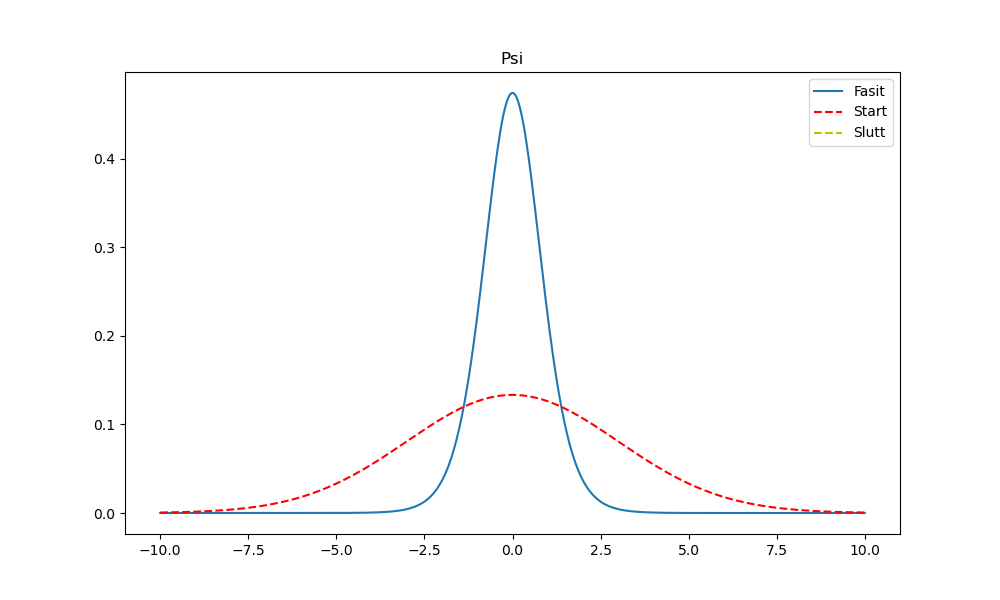

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Psi')


plt.plot(xi, (u/np.sqrt(h))**2, label = 'Fasit')
plot_psi(ax, [x0, sigma], 'r--', label = 'Start')
plot_psi(ax, [new_x0, new_sigma], 'y--', label = 'Slutt')

plt.legend();


### Plotting surface and paths

<IPython.core.display.Javascript object>


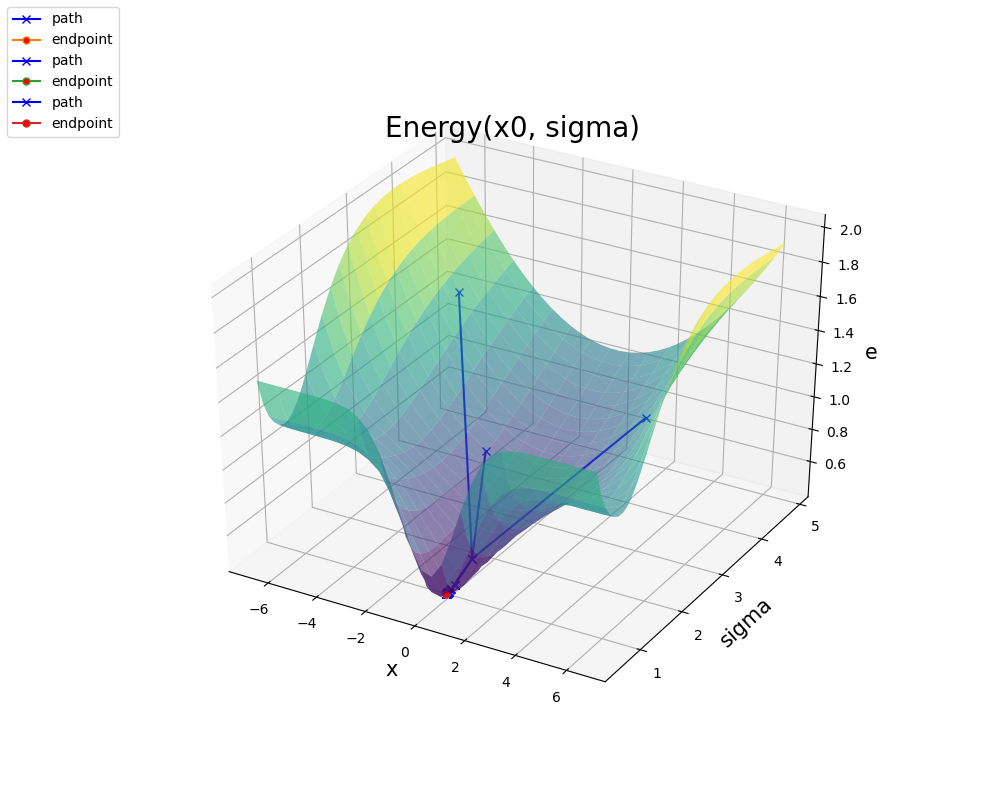

In [19]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
X, Y, E = create_plot_axes(-L/3, L/3, h*10, 0.5, 5, 0.1) 

ax.plot_surface(X, Y, Z=E.T, rstride=2, cstride=2, cmap='viridis', alpha = 0.6)

_, gradient_path_list, _ = gradient_descent([x0, sigma], lr=1, max_iterations=10000)
gradient_descent_plot(100, gradient_path_list)
_, gradient_path_list, _ = gradient_descent([4, 3.5], 1, 10000) 
gradient_descent_plot(100, gradient_path_list)
_, gradient_path_list, _ = gradient_descent([-5, 4], 1, 10000) 
gradient_descent_plot(100, gradient_path_list)

# Labels etc
ax.set_title('Energy(x0, sigma)', fontsize=20)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('sigma', fontsize=15)
ax.set_zlabel('e', fontsize=15)
ax.view_init(elev=35, azim=300)
fig.legend(loc='upper left');

### With three parameters

In [31]:
x0 = 0
a = 0.3
b = 0.002
lr = 1
max_iterations = 50000

# Initializing vectors
v_vector = np.array(v_func2(xi)).reshape(-1, 1)
finite_difference_matrix = finite_difference_scheme()

# Finding lowest energy
e_guess = compute_e(x0, a, b)

E , u = most_accurate_e()

# Running gradient descent
new_params, path_list, iterations = gradient_descent([x0, a, b], lr,max_iterations)

new_x0, new_a, new_b = new_params

print(f"x0 at guess: {x0}, a at guess: {a}, b at guess: {b}")
print(f"Energy at guess {e_guess}")

print(f"Used {iterations} out of {max_iterations} iterations\n")
print(f"Found x0: {new_x0}, found a: {new_a}, found b: {new_b}")
print(f"Found energy: {compute_e(new_x0, new_a, new_b)}\n")
print(f"Most accurate answer: {E}")

x0 at guess: 0, a at guess: 0.3, b at guess: 0.002
Energy at guess 0.4127927269520677
Used 50000 out of 50000 iterations

Found x0: 3.393986480748629e-17, found a: 0.30213128629362296, found b: -8.095680653662918e-05
Found energy: 0.41188818658000664

Most accurate answer: 0.4067462884853348


<IPython.core.display.Javascript object>


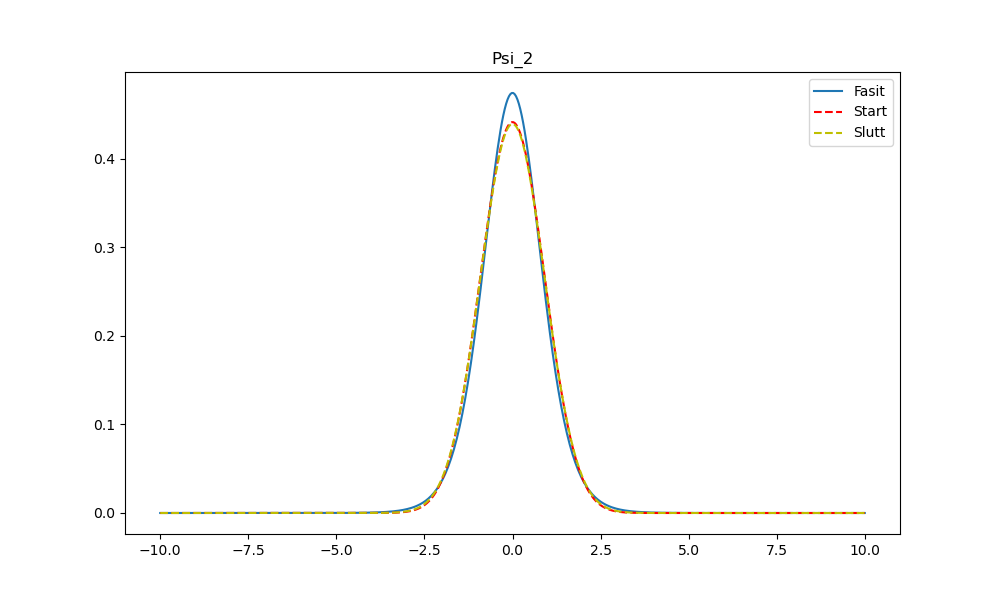

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Psi_2')


plt.plot(xi, (u/np.sqrt(h))**2, label = 'Fasit')
#plt.plot(xi, (u/np.sqrt(h))**2, label = 'Fasit')
plot_psi(ax, [x0, a, b],'r--', label = 'Start')
plot_psi(ax, [new_x0, new_a, new_b], 'y--', label = 'Slutt')

plt.legend();